# **So... What is deep learning?**
Deep learning is a technology which has received endless amounts of coverage in the news in the last few years. There have been endless new applications, from [DeepMind's AlphaFold](https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology) to [Samsung's Deepfake](https://arxiv.org/abs/2005.05535), and OpenAI's recent inovations with [GPT-3](https://arxiv.org/abs/2005.14165). These all used deep learning to achieve huge improvements in their respective field.

To give you a sense of how successful deep learning has been, take a look at this graph of the accuracy automated speech recognition (speech-to-text) before and after the advent of deep learning.

![Speech Recognition](https://drive.google.com/uc?export=view&id=14Zh6s0JdGs3yn6XbWLl7yN2HTXsdYzpc "Speech Recognition")
 
This success has been replicated in many different fields: from image/video processing to natural language processing and text translation. In this tutorial, I'm going to show you how simple and effective deep learning is. While not every application is suited to deep learning, in this notebook we will cover one that is: classifying handwritten digits. We will train a deep neural network to automatically classify handwritten digits using Tensorflow, Keras, and the MNIST dataset. If you don't know what all that jargon means, don't worry we'll cover it later!

Note that this tutorial expects you to already have an understanding of [logistic regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148). Logistic regression is at the core of machine learning and deep learning, so I highly suggest you take a look if you don't have an understanding of it already.

## Define the Problem

One of the key apects in solving pretty much anything is defining the problem. Let's begin doing that here.

What we want is to give the computer an image of a digit, and for the computer to give us back the number which the image represents.

![The Problem](https://drive.google.com/uc?export=view&id=1uKP5eAdChOVO6HT4J0mV9yLx0BFtZ2EY "Problem")

## How to Solve it
Now there are several ways we could go about this:

1. We could encode specific rules about each handwritten digit to make a classifier. So we would say a seven has two straight lines, an eight has two circular shapes, etc. While these rules are easy to communicate in English, getting a computer to understand them in code is a whole other level of difficulty. This would be a long, arduous, time-consuming task.


2. We could give the computer classified examples of each digit and have it automatically learn what each one means. There's some key language here though: What is a classified example? A classified example is one where we indicate what the digit actually is so the computer can learn from its mistakes. Algorithms which learn using classified examples are commonly known as supervised learning algorithms. 

Using method 2, our program learns the rules automatically rather than us having to manually code them up. Let's get started!

## Getting Started

We'll start off by importing all the necessary libraries. We'll be using Tensorflow, a machine learning & deep learning library, and MNIST, a dataset included with Tensorflow. **Note: This notebook is designed to be used in Google Colab. If you're using a Jupyter-notebook environment, remove the %tensorflow_version line and make sure you install tensorflow version 2.x into your environment**


In [92]:
# %tensorflow_version 2.x # If using Google Colab, uncomment this line

# Install these libraries if you need to
# I'd recommend using a Google Colab environment to make this easier for you - no installations required.

# If you're not using Google Colab, uncomment these lines
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install tensorflow
#!pip3 install pydot
#!pip3 install graphviz
#!pip3 install pydotplus

import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

# Load MNIST Dataset (included with Tensorflow)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Notice the dataset is in two buckets - train and test. 
# Training data are examples used to teach our model what each digit looks like
# We use test data to evaluate the performance of our model

## Inspect the Data

To understand the inputs and outputs of our network, first we must understand the data.

Let's take a look at the shape of the data:

In [93]:
print('Training data shape: {} '.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))

Training data shape: (60000, 28, 28) 
Test data shape (10000, 28, 28)


We can see that the training data contains 60000 samples and the test data contains 10000 samples. 

The number of samples is key to giving us an understanding of how thorough our test is. The greater the proportion of test data, the more sure we can be of our results. However, everytime we increase the proportion of test data we also lose data for training. This means we will typically lose some accuracy, and there is a balancing act at play.


Now we understand what the first dimension of the shape means. But what about the other two (28,28)? These are the pixel values representing the image for each sample. Let's take a look at a few examples.

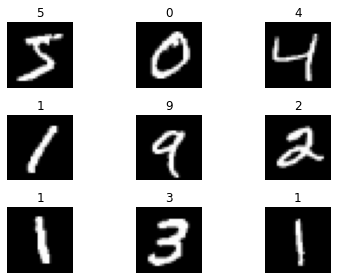

In [94]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    

# To align images without titles overlapping
plt.tight_layout()

Each image is represented by a 28x28 array of pixels. But a pixel is just a number - so what does the number mean?

Let's look at the min and max values so you can get an idea.

In [95]:
print('Max value: {}'.format(np.max(x_train[0]))) # Just to illustrate - you shouldn't take the max of 1 example
print('Min value: {}'.format(np.min(x_train[0])))

Max value: 255
Min value: 0


We can see the max value is 255 and the min value is 0. But it's not obvious exactly what these numbers mean.

A value of zero represents a pitch black pixel. And a value of 255 represents a fully white pixel. And any number in between is a gray level, with the pixels getting incrementally lighter-coloured the closer we get to 255. Now that we understand what the numbers represent, we can move onto creating our model.

## Creating the Model

Creating a model is rather simple, because the libraries we've imported take care of all the hard work for us. Tensorflow has built-in functions which allow us to change our models very easily. All of the back-end work is taken care of; we're not going to be coding up all the algorithms behind a neural network. Instead we get to use the simple interfaces they provide to create whatever model we want.

For this tutorial, we'll use the Keras API (in Tensorflow) to create our model.

In [96]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

We start off by creating a sequential model. The word sequential is used to indicate that the neural network is a linear stack of layers, with each layer's output becoming the input for the next layer.

The Flatten layer simply takes our input and creates a column vector out of it. This is our first layer, so it takes the input in the form (28, 28) and converts it to a column vector of (784,), where 784=28x28. This layer doesn't need to be considered part of the network; we could pre-process the data and flatten it ourselves before feeding it in. We use this layer for convenience.  Note that although we didn't input a shape to the image layer, after we feed it the first input of (28, 28) the layer is now configured for that shape. We are now unable to feed it an image of any other size (it would cause a runtime error).

Let's continue creating our model. We will use a Fully connected Neural Network, so we will use Dense layers.

![Dense vs Sparse](https://drive.google.com/uc?export=view&id=1C81QDt162cnEbj_495ObmR6Z8_Yopa6B "Dense Vs Sparse")

Notice that in the densely connected layer, each node has a connection to each of the previous nodes. A node can be called sparsely connected if it has fewer than the maximum number of connections. 

Now that we know what a Dense layer is, let's see what it looks like in code.

In [97]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 128 nodes, Relu activation

Neat right! Adding a dense layer is as simple as adding a line of code. 

You may have also noticed that the layer has two inputs, a number (128) and an activation (tf.nn.relu). The number refers to the number of nodes in that layer, and the activation refers to an activation function. If you're not familiar with the relu (Rectified Linear Unit) activation fuction  we used, I suggest you take a read of this [blog post](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0) on medium.

Let's finish off our model.

In [98]:
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu)) # 64 nodes, Relu activation
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu)) # 32 nodes, Relu activation

We added an additional 2 Dense layers to allow the network to understand more complex features. Typically, a deeper network can better represent and understand more complex features (e.x. diagonal lines, vertical lines, circles). These complex features however come at a cost (training time & computation time). For our network we'll stick with a relatively simple and shallow network.

In [99]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # 10 nodes (because 10 classes), softmax activation

Lastly, we add a Dense layer with a softmax activation function. If don't know what a softmax activation function is, that's fine. The important part to know is softmax converts the output of the layer to a probability. Notice that there are 10 nodes. Each node represents one of our 10 different classes (0-9). When we are predicting an input data point, the node which outputs the highest probability is considered to be the output class.  

## Training the Model

Before we can train the model, we must tell it what algorithm we want to use to optimize the weights of our network during our training process (the optimizer). This represents an algorithm, typically like gradient descent, which when given a loss measuring how inaccurate we are changes the weights of our model so that we'll be more accurate next time. We also give the model metrics which we use to assess how well it performed.

In [100]:
# The compile function defines the optimizer, loss function, and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [101]:
# Train the network
model.fit(x_train, y_train, epochs=5)

Epoch 1/6
1875/1875 [==============================] - 2s 825us/step - loss: 3.1033 - accuracy: 0.7828
Epoch 2/6
1875/1875 [==============================] - 2s 820us/step - loss: 0.2312 - accuracy: 0.9370
Epoch 3/6
1875/1875 [==============================] - 2s 803us/step - loss: 0.1604 - accuracy: 0.9531
Epoch 4/6
1875/1875 [==============================] - 1s 800us/step - loss: 0.1365 - accuracy: 0.9606
Epoch 5/6
1875/1875 [==============================] - 2s 810us/step - loss: 0.1135 - accuracy: 0.9673
Epoch 6/6
1875/1875 [==============================] - 2s 806us/step - loss: 0.0992 - accuracy: 0.9711


In [102]:
#Let's take a look at the model

#model.summary() # Gives us info about params and output at each stage

#model.save('num_classifier.model') # Saves model to a file

#print('model saved')

## Testing the model

Now that we've given the model metrics and trained it, let's take a look at a few samples and their predictions to see how well we matched the data.

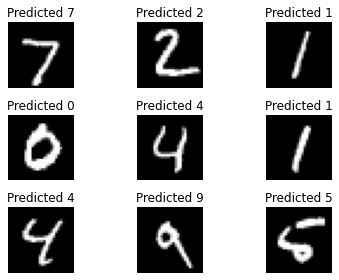

In [103]:
predictions = model.predict(x_test[0:10])
for i in range(9):
  plt.subplot(3,3,i+1)
  prediction = predictions[i]
  predicted_class = np.argmax(prediction)
  plt.title('Predicted {}'.format(predicted_class, y_test[i]))
  plt.axis('off')
  plt.imshow(x_test[i], cmap='gray')

# To align images without titles overlapping
plt.tight_layout()

Seems like we did quite well! Now rather than having to manually inspect all the data, let's use the evaluate() function which uses the optimizer and metrics we established earlier to help us determine our performance.

In [104]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1578 - accuracy: 0.9572


**You'll see we achieved an accuracy of 96%! Quite nice if you ask me.**

## Conclusion

Creating and testing this model was relatively simple - it took us about 40 lines of code. Imagine that we were given this exact same task but had to do it without a neurlal network. We would be manually coding up all of the rules that were learned automatically. Imagine how much time it would take to go over all of the edge cases and getting a computer to distinguish between someone's poorly written 5 and another person's 6. Having to code up all these rules would be very time consuming and very tedious. But with neural networks, it's so much simpler. We give it the data, and it figures out the solution.